In [1]:
from importlib import import_module
import tensorflow as tf
import keras
from keras.api._v2 import keras as KerasAPI
keras: KerasAPI = import_module("tensorflow.keras")
print(tf.__version__)

from keras import Model, layers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils import plot_model

from keras.utils import load_img
from keras.utils import img_to_array

import os
import shutil

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

2.9.0


In [2]:
path = ''
# from google.colab import drive
# drive.mount('/content/drive')
# path = '/content/drive/MyDrive/deepLearningAs3/'

pathfinal = path + 'model_history_II_tempb/'
pathfinal2 = path + 'model_images/'

epoch_val = 3000
batch_size_val = 32
threshold_val = 1e-4
inputShape = 784

random_state_global = 42
learning_rate_val = 1e-3

Hidden_layer_I_N = 25
Hidden_layer_II_N = 20
Hidden_layer_III_N = 15
Output_layer_N = 5

Hidden_layer_ED_N = 400

Hidden_layer_Activation = "tanh"
Output_layer_Activation = "softmax"

Output_layer_Encoder_Activation = "linear"


epsilon_val = 1e-8
beta_1_val = 0.9
beta_2_val = 0.999


class_l_r_to_d = {0:0, 1:1, 2:2, 4:3, 9:4}
class_l_d_to_r = {0:0, 1:1, 2:2, 3:4, 4:9}

In [3]:

def delete_folder_contents(pathfinal):
    folder_name = pathfinal
    # Get all files in the folder
    files = os.listdir(folder_name)

    # Loop through the files and delete them
    for file in files:
        file_path = os.path.join(folder_name, file)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
            if os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print(f"Error deleting {file_path}: {e}")

delete_folder_contents(pathfinal)

read and saving data

In [4]:
%%script echo skipping
# level 0 path
l0 = 'Group_20'

DATASET = {0:pd.DataFrame(), 1:pd.DataFrame(), 2:pd.DataFrame()}
temp_dict = {'train':0, 'val':1, 'test':2}

# iterate over files in
# that l0
for l1 in os.listdir(l0):
    f1 = os.path.join(l0, l1)
    for l2 in os.listdir(f1):
        f2 = os.path.join(f1, l2)
        for l3 in os.listdir(f2):
            f3 = os.path.join(f2, l3)
            # print(f3)
            img = load_img(f3, color_mode = "grayscale")
            data_point = tf.squeeze(tf.constant(img_to_array(img)))
            # print("shape:", data_point.shape) # shape: (28, 28)
            # data_point = data_point/255
            # print(tf.math.reduce_min(data_point), tf.math.reduce_max(data_point))
            # plt.imshow(data_point)
            # plt.show()

            temp = tf.reshape(data_point, shape=[-1]).numpy().tolist()
            
            #appending label
            temp.append(int(l2))

            # print("shape:",temp.shape) #shape: (784,)
            row = pd.Series(temp)
            # print('1')
            DATASET[temp_dict[l1]] = pd.concat([DATASET[temp_dict[l1]], row], axis=1)
            # plt.imshow(tf.reshape(temp, shape=(28,28)))
            # plt.show()


df_train = DATASET[0].transpose()
df_valid = DATASET[1].transpose()
df_test = DATASET[2].transpose()

## saving data
df_train.to_csv('df_train.csv', index=False)
df_valid.to_csv('df_valid.csv', index=False)
df_test.to_csv('df_test.csv', index=False)

skipping


In [5]:
def label_encoding(df):
    df[df.columns[-1]] = LabelEncoder().fit_transform(df.iloc[:,-1])
    return df

def normalizing_data(df):
    temp = df[df.columns[-1]]
    df = df/255
    df[df.columns[-1]] = temp
    return df

def data_visualize(df):
  np.random.seed(random_state_global)
  fig, axis = plt.subplots(3, 3, figsize=(6, 6))
  axis = axis.reshape(-1)
  for i in range(9):
    rand_index = np.random.choice(range(len(df)))
    axis[i].imshow(tf.reshape(df.iloc[rand_index,:-1], shape=(28,28)))
    axis[i].set_title(f'{class_l_d_to_r[df.iloc[rand_index,-1]]}')
    axis[i].axis(False)
  fig.suptitle("Data")
  plt.tight_layout()

In [6]:
df_train = pd.read_csv(path+'df_train.csv', dtype='float32')
df_valid = pd.read_csv(path+'df_valid.csv', dtype='float32')
df_test = pd.read_csv(path+'df_test.csv', dtype='float32')

print('df_train:', df_train.groupby(['784']).count().iloc[:,-1].to_dict())
print('df_valid:', df_valid.groupby(['784']).count().iloc[:,-1].to_dict())
print('df_test:', df_test.groupby(['784']).count().iloc[:,-1].to_dict())
print()

print(f'Initial Data Range: {min(df_train.iloc[:,:-1].min())} to {max(df_train.iloc[:,:-1].max())}')

df_train = label_encoding(normalizing_data(df_train))
df_valid = label_encoding(normalizing_data(df_valid))
df_test = label_encoding(normalizing_data(df_test))
print(f'Final Data Range: {min(df_train.iloc[:,:-1].min())} to {max(df_train.iloc[:,:-1].max())}')
print('Label Encoded')

print('Train Data',df_train.shape)
print('Valid Data',df_valid.shape)
print('Test Data' ,df_test.shape)

df_train: {0.0: 2277, 1.0: 2277, 2.0: 2277, 4.0: 2277, 9.0: 2277}
df_valid: {0.0: 759, 1.0: 759, 2.0: 759, 4.0: 759, 9.0: 759}
df_test: {0.0: 759, 1.0: 759, 2.0: 759, 4.0: 759, 9.0: 759}

Initial Data Range: 0.0 to 255.0
Final Data Range: 0.0 to 1.0
Label Encoded
Train Data (11385, 785)
Valid Data (3795, 785)
Test Data (3795, 785)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-04-16 23:00:22.006330: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-16 23:00:22.006425: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


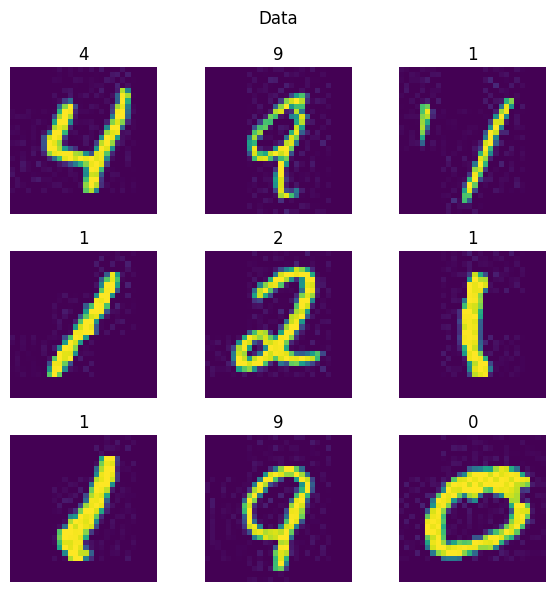

In [7]:
data_visualize(df_train)

In [8]:
# class StopOnThreshold(keras.callbacks.Callback):
#     def __init__(self, threshold):
#         super(StopOnThreshold, self).__init__()
#         self.threshold = threshold
#         self.previous_error = float('inf')
    
#     def on_epoch_end(self, epoch, logs=None):
#         current_error = logs.get('loss')
#         # print(f'\nEpoch {epoch+1} curent Err:{current_error}, Previous Err:{self.previous_error}')
#         if abs(current_error - self.previous_error) < self.threshold:
#             self.model.stop_training = True
#             print('\n\n********\nThreshold Reached\n********\n')
#         self.previous_error = current_error

class ModelSaving(keras.callbacks.Callback):
    def __init__(self):
        self.currentEpoch = 0
        
    def on_epoch_end(self, epoch, logs=None):
        self.currentEpoch = epoch

    def on_train_end(self, logs=None):
        self.model.save(f'{pathfinal}{self.model.name}_{self.currentEpoch+1}.tf')
        # print("Training has ended!, model saved")

    
class HistorySaver(keras.callbacks.Callback):
    def __init__(self, initial_history):
        super(HistorySaver, self).__init__()
        self.history = {}
        self.currentEpoch = 0
        
        for key, value in [('loss', initial_history[0]), ('accuracy', initial_history[1]), ('val_loss', initial_history[2]), ('val_accuracy', initial_history[3])]:
            self.history.setdefault(key, []).append(value)
        
        # logs.items() = dict_items([('loss', 1.3612865209579468), ('accuracy', 0.46034255623817444), ('val_loss', 1.1157031059265137), ('val_accuracy', 0.6484848856925964)])
    def on_epoch_end(self, epoch, logs=None):
        for key, value in logs.items():
            self.history.setdefault(key, []).append(value)
        self.currentEpoch = epoch
        
    def on_train_end(self, logs=None):
        pd.DataFrame(self.history).to_csv(f'{pathfinal}{self.model.name}_{self.currentEpoch+1}.csv', index=False)
        # print("Training has ended!, model history saved")


class HistorySaverAE(keras.callbacks.Callback):
    def __init__(self, initial_history):
        super(HistorySaverAE, self).__init__()
        self.history = {}
        self.currentEpoch = 0
        
        for key, value in [('loss', initial_history[0]), ('val_loss', initial_history[1])]:
            self.history.setdefault(key, []).append(value)
        
    def on_epoch_end(self, epoch, logs=None):
        for key, value in logs.items():
            self.history.setdefault(key, []).append(value)
        self.currentEpoch = epoch

        
    def on_train_end(self, logs=None):
        pd.DataFrame(self.history).to_csv(f'{pathfinal}{self.model.name}_{self.currentEpoch+1}.csv', index=False)
        # print("Training has ended!, model history saved")


# class EndTrainingCallback(tf.keras.callbacks.Callback):
#     def on_train_end(self, logs=None):
#         print("Training has ended!")

# create the callbacks

model_saver = ModelSaving()

# not initialize HistorySaver() here initialize inside function 
# stop_on_threshold = StopOnThreshold(threshold=threshold_val)

# This means if for 5 epochs the accuracy has no progress on 
# the validation set then it would stop and store the previous best value.
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='loss',
                                                  patience=1,
                                                  min_delta=threshold_val,
                                                  mode='min',
                                                  restore_best_weights=True, 
                                                  verbose=0)

# Adam optimizer

In [9]:
# initializer_I = tf.keras.initializers.HeNormal(seed=random_state_global)
# initializer_II = tf.keras.initializers.HeNormal(seed=random_state_global+1)
# initializer_III = tf.keras.initializers.HeNormal(seed=random_state_global+2)
# initializer_IV = tf.keras.initializers.HeNormal(seed=random_state_global+3)

initializer_I = tf.keras.initializers.GlorotUniform(seed=random_state_global)
initializer_II = tf.keras.initializers.GlorotUniform(seed=random_state_global+1)
initializer_III = tf.keras.initializers.GlorotUniform(seed=random_state_global+2)
initializer_IV = tf.keras.initializers.GlorotUniform(seed=random_state_global+3)
# layer = tf.keras.layers.Dense(3, kernel_initializer=initializer)
# values = initializer(shape=(2, 2))


In [10]:
class Autoencoder_1h_layer(Model):
  def __init__(self, latent_dim, m_name='model'):
    super(Autoencoder_1h_layer, self).__init__()
    self.latent_dim = latent_dim   
    self.m_name = m_name

    self.encoder = keras.Sequential([
      layers.Dense(latent_dim, activation=Hidden_layer_Activation, kernel_initializer=initializer_I),
    ])

    self.decoder = keras.Sequential([
      layers.Dense(inputShape, activation=Output_layer_Encoder_Activation, kernel_initializer=initializer_II),
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

  # Override the name property
  @property
  def name(self):
      return self.m_name

class Autoencoder_3h_layer(Model):
  def __init__(self, latent_dim, m_name='model'):
    super(Autoencoder_3h_layer, self).__init__()
    self.latent_dim = latent_dim   
    self.m_name = m_name

    self.encoder = keras.Sequential([
      layers.Dense(Hidden_layer_ED_N, activation=Hidden_layer_Activation, kernel_initializer=initializer_I),
      layers.Dense(latent_dim, activation=Hidden_layer_Activation, kernel_initializer=initializer_II),
    ])

    self.decoder = keras.Sequential([
      layers.Dense(Hidden_layer_ED_N, activation=Hidden_layer_Activation, kernel_initializer=initializer_III),
      layers.Dense(inputShape, activation=Output_layer_Encoder_Activation, kernel_initializer=initializer_IV),
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
  
  # Override the name property
  @property
  def name(self):
      return self.m_name

In [11]:
latent_dim_list = [32, 64, 128, 256]
autoencoder_1h_list = []
autoencoder_3h_list = []
for i in range(2*len(latent_dim_list)):
    tf.random.set_seed(random_state_global)

    autoencoder = None
    if(i<len(latent_dim_list)):
        autoencoder = Autoencoder_1h_layer(latent_dim_list[i], m_name=f'1h_layer_ae_{latent_dim_list[i%4]}')    
    else:
        autoencoder = Autoencoder_3h_layer(latent_dim_list[i%4], m_name=f'3h_layer_ae_{latent_dim_list[i%4]}')

    autoencoder.compile(optimizer='adam', loss=keras.losses.MeanSquaredError())

    # Evaluate the model initial losses
    initial_train_loss = autoencoder.evaluate(df_train.iloc[:,:-1], df_train.iloc[:,:-1], verbose=0)
    initial_valid_loss = autoencoder.evaluate(df_valid.iloc[:,:-1], df_valid.iloc[:,:-1], verbose=0)

    autoencoder.fit(df_train.iloc[:,:-1], df_train.iloc[:,:-1],
                    epochs=epoch_val,
                    batch_size=batch_size_val,
                    validation_data=(df_valid.iloc[:,:-1], df_valid.iloc[:,:-1]),
                    callbacks=[model_saver, HistorySaverAE((initial_train_loss, initial_valid_loss)), early_stopping_cb], 
                    verbose=0)
    if(i<len(latent_dim_list)):
        autoencoder_1h_list.append(autoencoder)
    else:
        autoencoder_3h_list.append(autoencoder)

2023-04-16 23:00:22.604516: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-16 23:00:22.766853: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-16 23:00:24.949219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


KeyboardInterrupt: 

### Observe  the  average  reconstruction errors  for  the  training,  validation, and  test  data.  Average reconstruction error is computed after the model is trained.

In [ ]:
for i in range(len(latent_dim_list)):    
    train_loss = autoencoder_1h_list[i].evaluate(df_train.iloc[:,:-1], df_train.iloc[:,:-1], verbose=0)
    valid_loss = autoencoder_1h_list[i].evaluate(df_valid.iloc[:,:-1], df_valid.iloc[:,:-1], verbose=0)
    test_loss = autoencoder_1h_list[i].evaluate(df_test.iloc[:,:-1], df_test.iloc[:,:-1], verbose=0)
    print(f'1h_layer_{latent_dim_list[i]}: train_loss: {train_loss}, valid_loss: {valid_loss}, test_loss: {test_loss}')

print()

for i in range(len(latent_dim_list)):    
    train_loss = autoencoder_3h_list[i].evaluate(df_train.iloc[:,:-1], df_train.iloc[:,:-1], verbose=0)
    valid_loss = autoencoder_3h_list[i].evaluate(df_valid.iloc[:,:-1], df_valid.iloc[:,:-1], verbose=0)
    test_loss = autoencoder_3h_list[i].evaluate(df_test.iloc[:,:-1], df_test.iloc[:,:-1], verbose=0)
    print(f'3h_layer_{latent_dim_list[i]}: train_loss: {train_loss}, valid_loss: {valid_loss}, test_loss: {test_loss}')

### Plotting model

### Take  one  image, from each  class,  from the training, validation,  and  test  set.  Give  their reconstructed images for each of the architectures ( along with original images). 

In [ ]:
def plotting_data(df, titile):
    fig, axis = plt.subplots(9, 5, figsize=(8, 20))
    axis = axis.reshape(-1)
    i=0
    axis[i+2].set_title(f'({titile}) Original Images 0, 1, 2, 4, 9')
    for num in range(5):
        example = tf.convert_to_tensor(df.loc[df[f'{df.shape[1]-1}'] == num].iloc[:1,:-1])
        axis[i].imshow(tf.reshape(example, shape=(28,28)))
        axis[i].axis(False)
        i+=1

    for m in range(4):
        axis[i+2].set_title(f'Reconstructed Images from {latent_dim_list[m]} latent dimensions and 1 Hidden layer')
        for num in range(5):
            example = tf.convert_to_tensor(df.loc[df.iloc[:,-1] == num].iloc[:1,:-1])
            encoded_img = autoencoder_1h_list[m].encoder(example)
            decoded_img = autoencoder_1h_list[m].decoder(encoded_img).numpy()
            axis[i].imshow(decoded_img.reshape(28, 28))
            axis[i].axis(False)
            i+=1

    for m in range(4):
        axis[i+2].set_title(f'Reconstructed Images from {latent_dim_list[m]} latent dimensions and 3 Hidden layer')
        for num in range(5):
            example = tf.convert_to_tensor(df.loc[df.iloc[:,-1] == num].iloc[:1,:-1])
            encoded_img = autoencoder_3h_list[m].encoder(example)
            decoded_img = autoencoder_3h_list[m].decoder(encoded_img).numpy()
            axis[i].imshow(decoded_img.reshape(28, 28))
            axis[i].axis(False)
            i+=1

    plt.tight_layout()
    plt.show()


In [ ]:
plotting_data(df_train, 'Training Data')

In [ ]:
plotting_data(df_valid, 'Validation Data')

In [ ]:
plotting_data(df_test, 'Testing Data')

# Classification  using  the compressed  representation  from the  1-h-l and 3-h-l  autoencoder:

In [ ]:
df_train_X_reduced_dim_dict = {}
df_valid_X_reduced_dim_dict = {}
df_test_X_reduced_dim_dict = {}
for i in range(len(latent_dim_list)):
    df_train_X_reduced_dim_dict[f'1h_layer_{latent_dim_list[i]}'] = autoencoder_1h_list[i].encoder(tf.convert_to_tensor(df_train.iloc[:,:-1]))
    df_train_X_reduced_dim_dict[f'3h_layer_{latent_dim_list[i]}'] = autoencoder_3h_list[i].encoder(tf.convert_to_tensor(df_train.iloc[:,:-1]))   
    
    df_valid_X_reduced_dim_dict[f'1h_layer_{latent_dim_list[i]}'] = autoencoder_1h_list[i].encoder(tf.convert_to_tensor(df_valid.iloc[:,:-1]))
    df_valid_X_reduced_dim_dict[f'3h_layer_{latent_dim_list[i]}'] = autoencoder_3h_list[i].encoder(tf.convert_to_tensor(df_valid.iloc[:,:-1]))
    
    df_test_X_reduced_dim_dict[f'1h_layer_{latent_dim_list[i]}'] = autoencoder_1h_list[i].encoder(tf.convert_to_tensor(df_test.iloc[:,:-1]))
    df_test_X_reduced_dim_dict[f'3h_layer_{latent_dim_list[i]}'] = autoencoder_3h_list[i].encoder(tf.convert_to_tensor(df_test.iloc[:,:-1]))


In [ ]:
# initializer_I = tf.keras.initializers.HeNormal(seed=random_state_global)
# initializer_II = tf.keras.initializers.HeNormal(seed=random_state_global+1)
# initializer_III = tf.keras.initializers.HeNormal(seed=random_state_global+2)
# initializer_IV = tf.keras.initializers.HeNormal(seed=random_state_global+3)

initializer_I = tf.keras.initializers.GlorotUniform(seed=random_state_global)
initializer_II = tf.keras.initializers.GlorotUniform(seed=random_state_global+1)
initializer_III = tf.keras.initializers.GlorotUniform(seed=random_state_global+2)
initializer_IV = tf.keras.initializers.GlorotUniform(seed=random_state_global+3)
# layer = tf.keras.layers.Dense(3, kernel_initializer=initializer)
# values = initializer(shape=(2, 2))


In [ ]:
class FCNN_Classifier(Model):
  def __init__(self, m_input_shape, m_name='model'):
    super(FCNN_Classifier, self).__init__()
    self.m_name = m_name
    self.m_input_shape = m_input_shape

    self.H_layer_1 = layers.Dense(Hidden_layer_I_N, activation=Hidden_layer_Activation, kernel_initializer=initializer_I, name="Hidden_layer_I")
    self.H_layer_2 = layers.Dense(Hidden_layer_II_N, activation=Hidden_layer_Activation, kernel_initializer=initializer_II,name="Hidden_layer_II")
    self.H_layer_3 = layers.Dense(Hidden_layer_III_N, activation=Hidden_layer_Activation, kernel_initializer=initializer_III,name="Hidden_layer_III")
    self.output_layer = layers.Dense(Output_layer_N, activation=Output_layer_Activation,kernel_initializer=initializer_IV, name="Output_layer")

  def call(self, inputs):
    x = self.H_layer_1(inputs)
    x = self.H_layer_2(x)
    x = self.H_layer_3(x)
    x = self.output_layer(x)
    return x
  
  def build_graph(self):
      x = layers.Input(shape=(self.m_input_shape,), name="Input_layer")
      return Model(inputs=[x], outputs=self.call(x))
  
  # Override the name property
  @property
  def name(self):
      return self.m_name


In [ ]:
# %%script echo skipping

model_dict = {}
history_dict = {}

size_dict = len(df_train_X_reduced_dim_dict)
for i in range(size_dict):
  # Set random seed
  tf.random.set_seed(random_state_global)
  
  input_size = latent_dim_list[int(i%(size_dict/2))]
  
  key = None
  if(i<(size_dict/2)):
    key = f'1h_layer_{input_size}'
  else:
    key = f'3h_layer_{input_size}'
  
  df_tr = df_train_X_reduced_dim_dict[key]
  df_val = df_valid_X_reduced_dim_dict[key]
  model = FCNN_Classifier(m_input_shape=input_size, m_name=key)
    


  model.build(input_shape=(None, input_size)) # assuming the input shape is (batch_size, n_components_list[i])
  
  # Compile the model
  model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=keras.optimizers.Adam(learning_rate=learning_rate_val, 
                                                  epsilon=epsilon_val,
                                                  beta_1=beta_1_val,
                                                  beta_2=beta_2_val), 
                  metrics=["accuracy"])

  # Evaluate the model initial losses
  initial_train_loss, initial_train_acc = model.evaluate(df_tr, df_train.iloc[:,-1], verbose=0)
  initial_valid_loss, initial_valid_acc = model.evaluate(df_val, df_valid.iloc[:,-1], verbose=0)

  # Fit the model
  history = model.fit(df_tr,
                        df_train.iloc[:,-1],
                        epochs=epoch_val,
                        batch_size=batch_size_val,
                        validation_data=(df_val, df_valid.iloc[:,-1]),
                        callbacks=[model_saver, HistorySaver((initial_train_loss, initial_train_acc, initial_valid_loss, initial_valid_acc)), early_stopping_cb], verbose=0)

  df_model_history = pd.DataFrame(history.history)
  
  model_dict[key] = model
  history_dict[key] = df_model_history

In [ ]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=10): 
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

def makingPredictionWithCM(model, df_test_X, df_test_Y):
    y_true = df_test_Y
    y_prob_a = model.predict(df_test_X, verbose=0)
    y_pred_a = y_prob_a.argmax(axis=1)
    make_confusion_matrix(y_true, y_pred_a, classes=list(map(lambda el: class_l_d_to_r[el], [0,1,2,3,4])))



def inferences(df_model_history, model, df_test_X, df_test_Y):
    print(f'Training Accuracy for model: {df_model_history["accuracy"].to_list()[-1]*100:.2f}%')
    print(f'Validation Accuracy for model: {df_model_history["val_accuracy"].to_list()[-1]*100:.2f}%')
    print(f'Test Accuracy for model: {model.evaluate(df_test_X, df_test_Y, verbose=0)[1]*100:.2f}%')

    df_model_history.plot(title="Accuracy / Loss vs Epoch", xlabel='Epoch', ylabel='Accuracy / Loss')
    plt.show()

    df_model_history['loss'].plot(title="Average training error vs epochs", xlabel='Epoch', ylabel='Loss')
    plt.show()

In [ ]:
size_dict = len(df_train_X_reduced_dim_dict)
for i in range(size_dict):
  input_size = latent_dim_list[int(i%(size_dict/2))]
  key = None

  if(i<(size_dict/2)):
    key = f'1h_layer_{input_size}'
  else:
    key = f'3h_layer_{input_size}'

  print('#######################################')
  print(f'{key}_components')
  print('#######################################')
  makingPredictionWithCM(model_dict[key], df_test_X_reduced_dim_dict[key], df_test.iloc[:,-1])
  inferences(history_dict[key], model_dict[key], df_test_X_reduced_dim_dict[key], df_test.iloc[:,-1])
